In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
from dynamo.dynamic_arimax_model_prediction import DynamicARIMAXModelPrediction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wd =  './data/data_original/alpha_diversity/shannon/'

In [3]:
male_data = pd.read_csv(wd + 'male_shannon_entropy.csv')
female_data = pd.read_csv(wd + 'female_shannon_entropy.csv')
donorA_data = pd.read_csv(wd + 'donorA_shannon_entropy.csv')
donorB_data = pd.read_csv(wd + 'donorB_shannon_entropy.csv')#.iloc[:150]

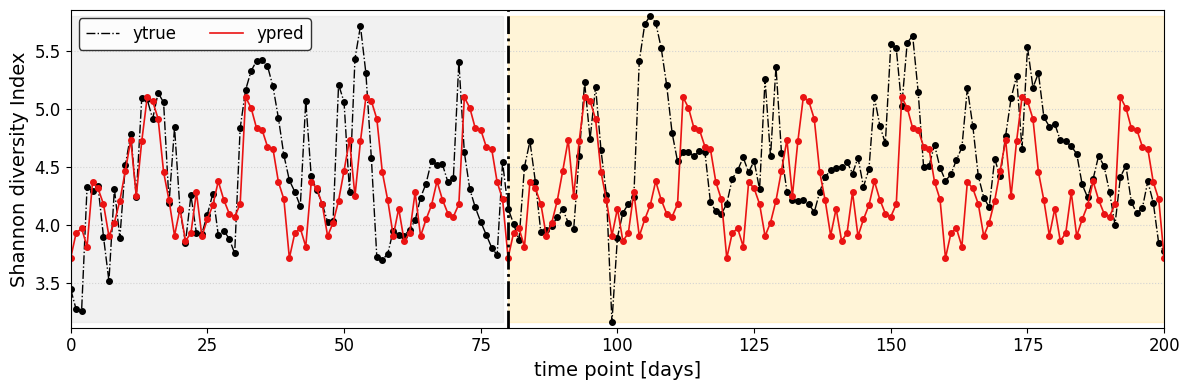

In [4]:
male_param_dict = {'n_modes':6,
                         'p':3, 
                         'd':0,
                         'q':10}

male_y_true, male_y_pred = DynamicARIMAXModelPrediction.dynamic_model_predict(male_data, **male_param_dict)
DynamicARIMAXModelPrediction.plot_prediction(male_y_true, male_y_pred, 'male')

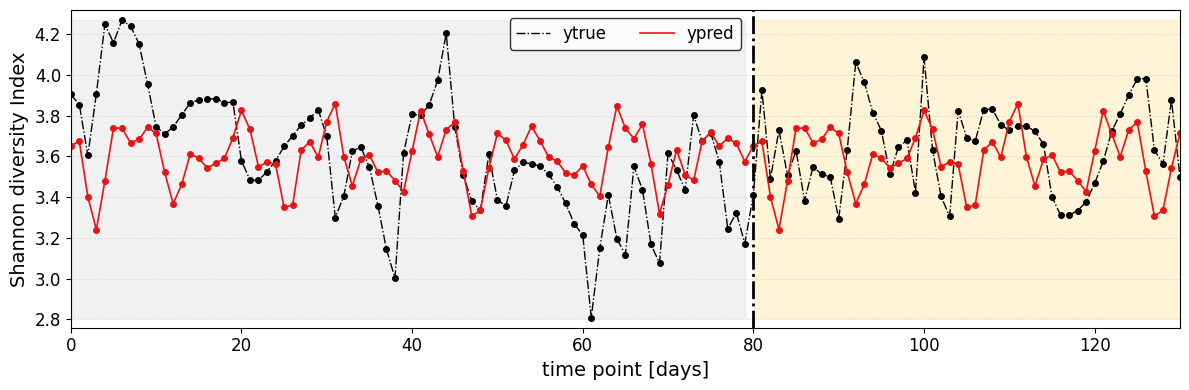

In [5]:
female_param_dict = {'n_modes':6,
                         'p':2, 
                         'd':0,
                         'q':7}
new_index = female_data.iloc[50:].index
data = female_data.iloc[50:].reset_index(drop=True).astype(float)

female_y_true, female_y_pred = DynamicARIMAXModelPrediction.dynamic_model_predict(data, **female_param_dict)
DynamicARIMAXModelPrediction.plot_prediction(female_y_true, female_y_pred, 'female')

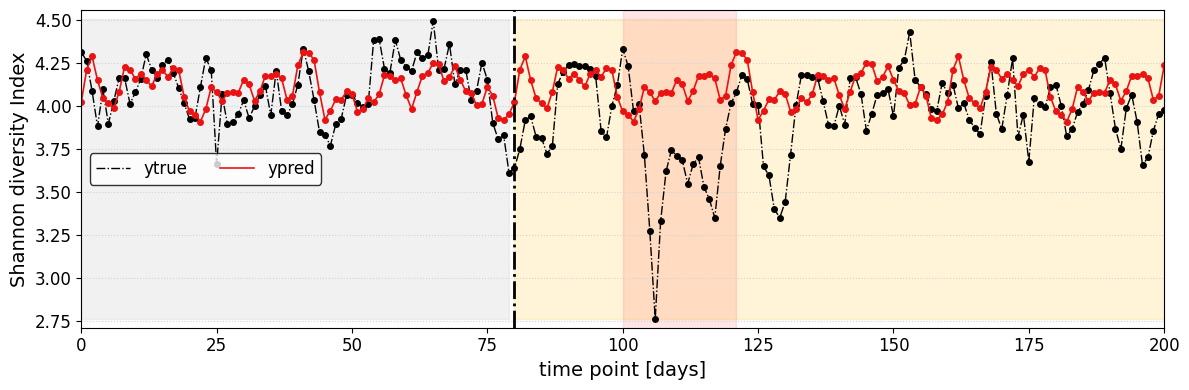

In [6]:
donorA_param_dict = {'n_modes':6,
                         'p':3, 
                         'd':0,
                         'q':1}

donorA_y_true, donorA_y_pred = DynamicARIMAXModelPrediction.dynamic_model_predict(donorA_data, **donorA_param_dict)
DynamicARIMAXModelPrediction.plot_prediction(donorA_y_true, donorA_y_pred, 'donorA')

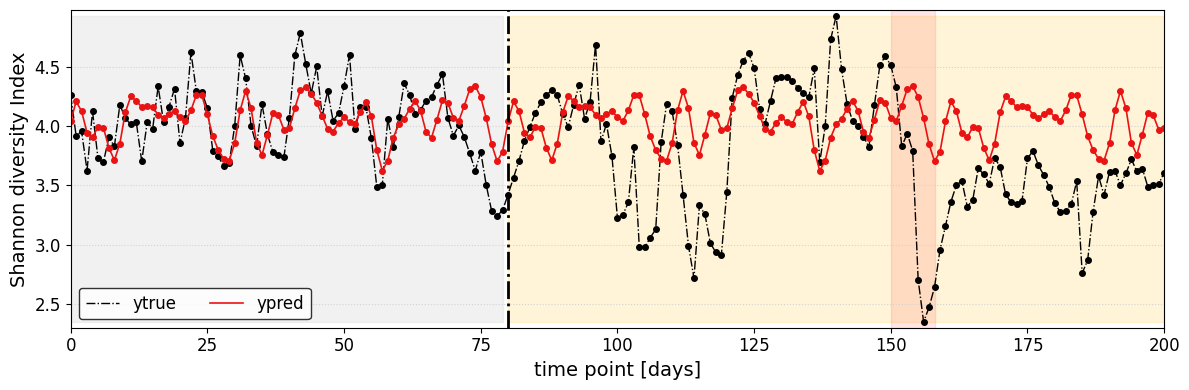

In [7]:
donorB_param_dict = {'n_modes':6,
                         'p':4, 
                         'd':0,
                         'q':7}

donorB_y_true, donorB_y_pred = DynamicARIMAXModelPrediction.dynamic_model_predict(donorB_data, **donorB_param_dict)
DynamicARIMAXModelPrediction.plot_prediction(donorB_y_true, donorB_y_pred, 'donorB')

D:\AGH-Infa\Sano\dynamo_library\.venv\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
D:\AGH-Infa\Sano\dynamo_library\.venv\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
D:\AGH-Infa\Sano\dynamo_library\.venv\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
D:\AGH-Infa\Sano\dynamo_library\.venv\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


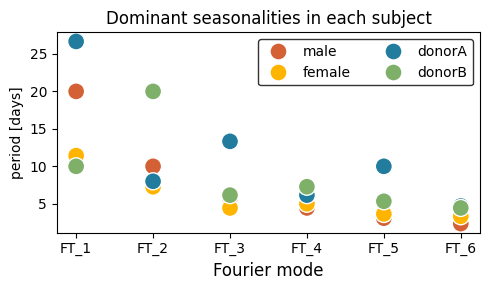

In [8]:
cmap = {'male':'#d36135', 
        'female':'#ffb400' ,
        'donorA':'#227c9d', 
        'donorB':'#7fb069'}

periods = pd.concat([DynamicARIMAXModelPrediction.get_periods(male_data.iloc[:80], 6, 'male'),
          DynamicARIMAXModelPrediction.get_periods(female_data.iloc[50:130], 6, 'female'),
          DynamicARIMAXModelPrediction.get_periods(donorA_data.iloc[:80], 6, 'donorA'),
          DynamicARIMAXModelPrediction.get_periods(donorB_data.iloc[:80], 6, 'donorB')])

plt.figure(figsize = (5, 3))
sns.scatterplot(data=periods, x = 'index', y = 'period [days]', hue = 'subject', legend=True, s=150, palette=cmap)
plt.legend(fancybox=True, ncol=2, edgecolor='k')
plt.xlabel('Fourier mode', fontsize=12)
plt.title('Dominant seasonalities in each subject', fontsize=12)
plt.tight_layout()

In [9]:
#get test sets

male_score = DynamicARIMAXModelPrediction.get_prediction_scores(male_y_true[80:], male_y_pred[80:], 'male')
female_score = DynamicARIMAXModelPrediction.get_prediction_scores(female_y_true[80:], female_y_pred[80:], 'female')
donorA_score = DynamicARIMAXModelPrediction.get_prediction_scores(donorA_y_true[80:], donorA_y_pred[80:], 'donorA')
donorB_score = DynamicARIMAXModelPrediction.get_prediction_scores(donorB_y_true[80:], donorB_y_pred[80:], 'donorB')

scores = pd.concat([male_score, female_score, donorA_score, donorB_score])

In [10]:
print(male_score.head())

    emd  mape subject
0  0.10  0.06    male
1  0.10  0.07    male
2  0.16  0.08    male
3  0.36  0.12    male
4  0.52  0.12    male


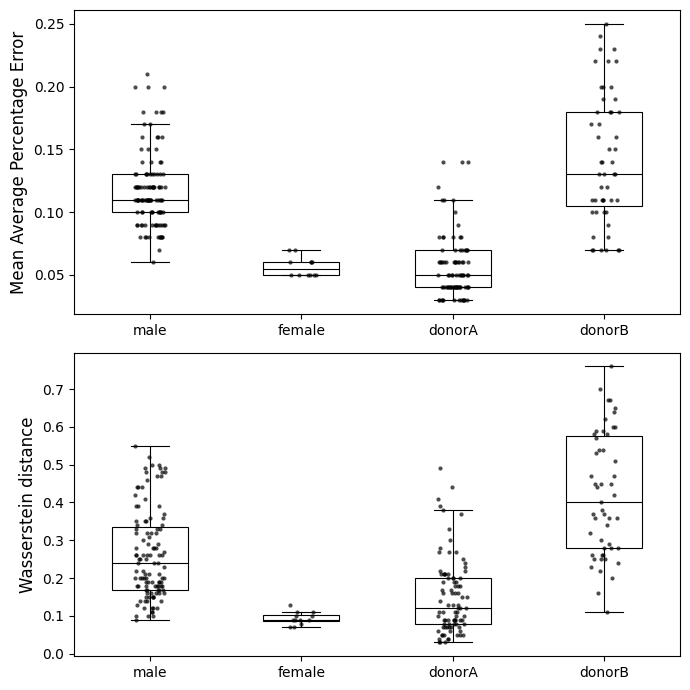

In [11]:
fig, axes = DynamicARIMAXModelPrediction.plot_box_stripplots(scores, 'subject', 'mape', 'emd')
plt.show()